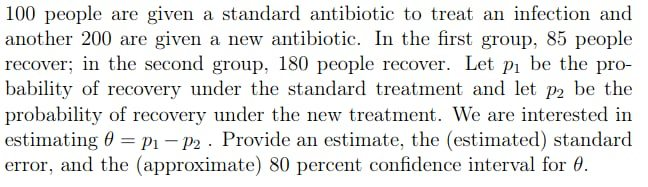

$$SE(\theta) = \sqrt{\frac{p_1(1-p_1)}{n_1}+\frac{p_2(1-p_2)}{n_2}} $$

$$ME = z \cdot SE(\theta)$$
We are given:

- **Group 1 (standard antibiotic):**  
  $$ n_1 = 100, \quad x_1 = 85 \Rightarrow \hat{p}_1 = \frac{85}{100} = 0.85 $$

- **Group 2 (new antibiotic):**  
  $$ n_2 = 200, \quad x_2 = 180 \Rightarrow \hat{p}_2 = \frac{180}{200} = 0.90 $$

We are estimating:  
$$
\theta = p_1 - p_2 \Rightarrow \hat{\theta} = \hat{p}_1 - \hat{p}_2 = 0.85 - 0.90 = -0.05
$$

---

### **Estimated Standard Error (SE) of $ \hat{\theta} $**

$$
SE = \sqrt{ \frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2} }
= \sqrt{ \frac{0.85 \times 0.15}{100} + \frac{0.90 \times 0.10}{200} }
= \sqrt{ \frac{0.1275}{100} + \frac{0.09}{200} }
= \sqrt{0.001275 + 0.00045}
= \sqrt{0.001725} \approx 0.0415
$$

---

### **80% Confidence Interval (CI)**

For an 80% CI, the z-critical value is:
$$
z_{0.10/2} = z_{0.05} \approx 1.28
$$

Then,
$$
CI = \hat{\theta} \pm z \cdot SE = -0.05 \pm 1.28 \cdot 0.0415 \\
= -0.05 \pm 0.0531 \Rightarrow (-0.1031, 0.0031)
$$

---

### **Final Answer:**

- Estimate of $ \theta $: **−0.05**  
- Standard error: **0.0415**  
- Approximate 80% confidence interval: **(−0.1031, 0.0031)**

This suggests that the new



In [3]:
from scipy.stats import norm

def get_critical_z_value(confidence_level):
    """
    Calculate the critical z-value for a given confidence level.
    
    Parameters:
        confidence_level (float): Confidence level (e.g., 0.80 for 80%).
    
    Returns:
        float: Critical z-value.
    """
    alpha = 1 - confidence_level
    # For a two-tailed test, we want the (1 - alpha/2) percentile
    z_critical = norm.ppf(1 - alpha / 2)
    return z_critical

# Example: Calculate z-value for 80% confidence
confidence_level = 0.80
z_value = get_critical_z_value(confidence_level)
print(f"Critical z-value for {confidence_level*100}% confidence: {z_value:.4f}")

Critical z-value for 80.0% confidence: 1.2816


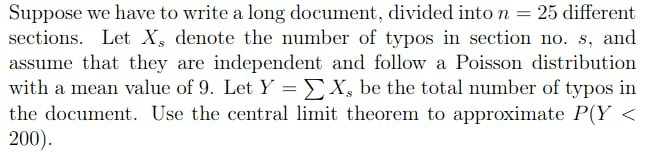

We are given:

- $n = 25$ sections.
- Each $X_s \sim \text{Poisson}(9)$, independently.
- Let $Y = \sum_{s=1}^{25} X_s$, the total number of typos.
- Goal: Approximate $P(Y < 200)$ using the **Central Limit Theorem (CLT)**.

---

### **Step 1: Distribution of $Y$**

Since $X_s \sim \text{Poisson}(9)$ and the sum of independent Poisson variables is also Poisson with summed means:

$$
Y \sim \text{Poisson}(25 \times 9) = \text{Poisson}(225)
$$

But we will use the **CLT** approximation:

$$
Y \approx \mathcal{N}(\mu = 225, \sigma^2 = 225) \Rightarrow Y \approx \mathcal{N}(225, 15^2)
$$

---

### **Step 2: Standardize for CLT**

We want to find:

$$
P(Y < 200) \approx P\left(Z < \frac{200 - 225}{15}\right)
= P\left(Z < -\frac{25}{15}\right)
= P(Z < -1.\overline{6}) \approx P(Z < -1.67)
$$

Using standard normal tables or a calculator:

$$
P(Z < -1.67) \approx 0.0475
$$

---

### **Final Answer:**

$$
P(Y < 200) \approx \boxed{0.0475}
$$



In [4]:
from scipy.stats import norm
prob = norm.cdf(-1.6667)  # ≈ 0.0478

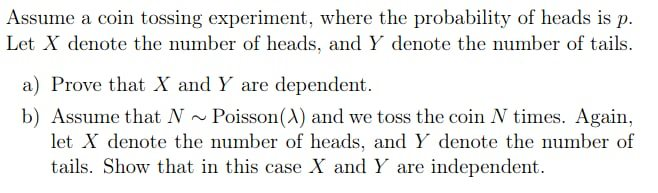

Assume a coin tossing experiment where the probability of heads is $p$.

Let $X$ be the number of heads and $Y$ be the number of tails.

---

### **(a) Prove that $X$ and $Y$ are dependent**

Suppose we toss the coin $n$ times. Then:

- $X + Y = n$, since each toss results in either a head or a tail.

This implies that once you know $X$, you can determine $Y = n - X$, and vice versa. Therefore, the random variables $X$ and $Y$ are **perfectly negatively correlated** and hence **dependent**.

---

### **(b) Now assume $N \sim \text{Poisson}(\lambda)$ and we toss the coin $N$ times. Let $X$ be the number of heads and $Y$ the number of tails. Show that $X$ and $Y$ are independent**

Let us analyze the situation:

- Conditional on $N = n$, $X \sim \text{Binomial}(n, p)$ and $Y = n - X$.
- But $N$ itself is random and follows a Poisson distribution.

Let us define the problem:

- Given $N \sim \text{Poisson}(\lambda)$
- Each toss results in head with probability $p$ and tail with probability $1 - p$.

Let’s consider $X$ and $Y$ as sums of independent Poisson trials.

Let $X$ = number of heads, and $Y$ = number of tails. Then:

- $X \sim \text{Poisson}(\lambda p)$  
- $Y \sim \text{Poisson}(\lambda (1 - p))$

Moreover, $X$ and $Y$ are **independent** Poisson random variables.

This is a standard result: if $N \sim \text{Poisson}(\lambda)$ and conditional on $N$, $(X, Y) \sim \text{Multinomial}(N; p, 1-p)$, then the **marginals** of $X$ and $Y$ are **independent Poisson**:

$$
X \sim \text{Poisson}(\lambda p), \quad Y \sim \text{Poisson}(\lambda (1 - p)), \quad \text{and } X \perp Y
$$

---

### **Final Conclusion:**

- **(a)** $X$ and $Y$ are dependent if the number of tosses $n$ is fixed.
- **(b)** If the number of tosses $N$ is Poisson distributed, then $X$ and $Y$ are **independent**.


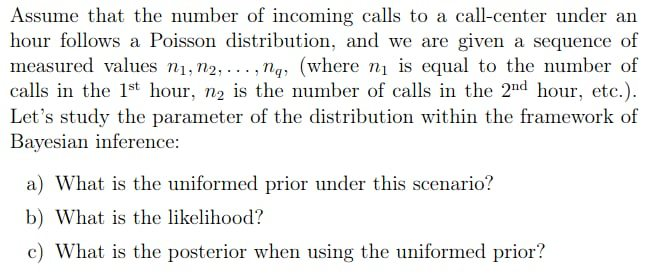

## Part (a): Uninformative Prior
The uninformative prior for the Poisson rate parameter \($\lambda$\) is:

$$
p(\lambda) \propto \frac{1}{\lambda}
$$

**Explanation**:  
This Jeffreys prior is:
- The conjugate prior is the Gamma distribution
- Scale-invariant (treats all orders of magnitude equally)
- Equivalent to \($\text{Gamma}(0, 0)$\)
- Leads to a proper posterior when \($S \geq 1$\)

## Part (b): Likelihood Function
The likelihood of observing the data given \($\lambda$\) is:

$$
P(\{n_i\} \mid \lambda) \propto e^{-q\lambda} \lambda^S
$$

**Derivation**:
1. Product of Poisson PMFs: \($\prod_{i=1}^q \frac{e^{-\lambda}\lambda^{n_i}}{n_i!}$\)
2. Combine terms: \($e^{-q\lambda}\lambda^S \times \text{constant}$\)
3. Drop multiplicative constants

## Part (c): Posterior Distribution
Using Bayes' theorem with the uninformative prior:

$$
p(\lambda \mid \{n_i\}) \sim \text{Gamma}(S, q)
$$

**Derivation**:
$$
\text{Posterior} \propto \text{Prior} \times \text{Likelihood} = \frac{1}{\lambda} \times e^{-q\lambda}\lambda^S = e^{-q\lambda}\lambda^{S-1}
$$

This is the kernel of \($\text{Gamma}(S, q)$\).

# Financial questions

ATM = At the money - the strike is equal to the spot (the threshold is the price at this moment of time)

- $u\cdot d = 1$
- $u = exp(\sigma \sqrt{T})$ where $\sigma$ - volatility
- $p u S_0 + (1-p) d S_0 = S_0 e^{rT}$

Definitions for the pricing:   $\ d_{\ 1}={\displaystyle{\frac{ \log\left(\ S_{\ 0}\ \mathit{/}\ K\ \right) + \left(\ r + \ \sigma^{\ 2}\ \mathit{/}\ \,2\ \right)\ T  }{\sigma\ \sqrt{T\,}} }}\ $    and    $\ d_{\ 2}=d_{\ 1}-\sigma\ \sqrt{T\,}\ .$

$ \ \ \ \ c=S_{\ 0}\ N \left(\ d_{\ 1}\ \right) - K\ e^{\ -\ r\ T}\ N \left(\ d_{\ 2}\ \right)\ $.




In [1]:
import numpy as np
from scipy.special import erf
from matplotlib import pyplot as plt
from numbers import Number


def std_norm_cdf(x):
    """Cumulated Distribution Function of the Standard Normal Distribution"""
    return 0.5 * (1 + erf(x / np.sqrt(2)))


def eur_call_black_scholes_price(T=None, K=None, S0=None, sigma=None, r=None):
    """
    Price of the European call option. 
    If K is an np.array, then the output will be the np.array containing the corresponding prices.

    r:     constant risk-free short rate
    T:     time to maturity given in year fractions
    S0:    spot price of the underlying stock
    sigma: volatility of the underlying stock
    K:     strike price of the option
    """
    
    # calculations and output
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * T ** 0.5)
    d2 = d1 - sigma * T ** 0.5

    return S0 * std_norm_cdf(d1) - K * np.exp((-1.0) * r * T) * std_norm_cdf(d2)    


# test
assert round(eur_call_black_scholes_price(T=1.0, K=1.0, S0=1.0, sigma=0.1, r=0.03), 6) == 0.055819, (
    'Failed test for eur_call_bs_price')